#                                       CAPSTONE PROJECT

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = 'C:\\Users\\Akshat Jain\\Downloads\\aclImdb\\train\\neg'
data2 = []
files = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files:
      with open (f, "r",encoding="utf8") as myfile:
               data2.append(myfile.read())
df_3=pd.DataFrame(data2,columns=['review'])
df_3['label']='neg'
path = 'C:\\Users\\Akshat Jain\\Downloads\\aclImdb\\test\\pos'
data3 = []
files = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files:
      with open (f, "r",encoding="utf8") as myfile:
               data3.append(myfile.read())
df_4=pd.DataFrame(data3,columns=['review'])
df_4['label']='pos'
train_df = pd.concat([df_3,df_4])
train_df.head()

,review,label
0,Story of a man who has unnatural feelings for ...,neg
1,Airport '77 starts as a brand new luxury 747 p...,neg
2,This film lacked something I couldn't put my f...,neg
3,"Sorry everyone,,, I know this is supposed to b...",neg
4,When I was little my parents took me along to ...,neg


In [3]:
path = 'C:\\Users\\Akshat Jain\\Downloads\\aclImdb\\test\\neg'
data = []
files = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files:
      with open (f, "r",encoding="utf8") as myfile:
               data.append(myfile.read())
df_1=pd.DataFrame(data,columns=['review'])
df_1['label']='neg'
path = 'C:\\Users\\Akshat Jain\\Downloads\\aclImdb\\test\\pos'
data1 = []
files = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files:
      with open (f, "r",encoding="utf8") as myfile:
               data1.append(myfile.read())
df_2=pd.DataFrame(data1,columns=['review'])
df_2['label']='pos'
df_2.head()
test_df = pd.concat([df_1,df_2])
test_df.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [4]:
print(test_df.shape)
print(train_df.shape)

(25001, 2)
(25000, 2)


In [5]:
test_df['review'] = test_df['review'].str.lower().str.split()
train_df['review'] = train_df['review'].str.lower().str.split()

In [6]:
#####Remove stop words from the data
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
test_df['review'] = test_df['review'].apply(lambda x: [word for word in x if word not in stop])
test_df.head()

,review,label
0,"[mr., costner, dragged, movie, far, longer, ne...",neg
1,"[example, majority, action, films, same., gene...",neg
2,"[first, hate, moronic, rappers,, could'nt, act...",neg
3,"[even, beatles, could, write, songs, everyone,...",neg
4,"[brass, pictures, (movies, fitting, word, them...",neg


In [7]:
train_df['review'] = train_df['review'].apply(lambda x: [word for word in x if word not in stop])
train_df.head()

,review,label
0,"[story, man, unnatural, feelings, pig., starts...",neg
1,"[airport, '77, starts, brand, new, luxury, 747...",neg
2,"[film, lacked, something, put, finger, first:,...",neg
3,"[sorry, everyone,,,, know, supposed, ""art"", fi...",neg
4,"[little, parents, took, along, theater, see, i...",neg


In [8]:
###Removing punctuations, HTML tags (like br) etc
def remove_html_tags(review):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', review)
test_df["review"] = test_df["review"].astype(str).map(remove_html_tags)
train_df['review'] = train_df['review'].astype(str).map(remove_html_tags)
train_df.head()

,review,label
0,"['story', 'man', 'unnatural', 'feelings', 'pig...",neg
1,"['airport', ""'77"", 'starts', 'brand', 'new', '...",neg
2,"['film', 'lacked', 'something', 'put', 'finger...",neg
3,"['sorry', 'everyone,,,', 'know', 'supposed', '...",neg
4,"['little', 'parents', 'took', 'along', 'theate...",neg


In [9]:
import string
test_df["review"] = test_df["review"].astype(str).apply(lambda x : x.translate(str.maketrans('','', string.punctuation)))
train_df["review"] = train_df["review"].astype(str).apply(lambda x : x.translate(str.maketrans('','', string.punctuation)))
train_df.head()

,review,label
0,story man unnatural feelings pig starts openin...,neg
1,airport 77 starts brand new luxury 747 plane l...,neg
2,film lacked something put finger first charism...,neg
3,sorry everyone know supposed art film wow hand...,neg
4,little parents took along theater see interior...,neg


In [10]:
test_df["review"] = test_df["review"].astype(str).apply(lambda x : x.translate(str.maketrans('','', string.digits)))
train_df["review"] = train_df["review"].astype(str).apply(lambda x : x.translate(str.maketrans('','', string.digits)))
train_df.head()

,review,label
0,story man unnatural feelings pig starts openin...,neg
1,airport starts brand new luxury plane loaded...,neg
2,film lacked something put finger first charism...,neg
3,sorry everyone know supposed art film wow hand...,neg
4,little parents took along theater see interior...,neg


In [16]:
####Apply Stemming and Lemmatization
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
test_df['review'] = test_df['review'].astype(str).str.split().apply(lambda x: ' '.join([ps.stem(word) for word in x]))
train_df['review'] = train_df['review'].astype(str).str.split().apply(lambda x: ' '.join([ps.stem(word) for word in x]))
train_df.head()

,review,label
0,stori man unnatur feel pig start open scene te...,neg
1,airport start brand new luxuri plane load valu...,neg
2,film lack someth put finger first charisma par...,neg
3,sorri everyon know suppos art film wow hand gu...,neg
4,littl parent took along theater see interior o...,neg


In [17]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
test_df['review'] = test_df['review'].astype(str).str.split().apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x]))
train_df['review'] = train_df['review'].astype(str).str.split().apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x]))
train_df.head()

,review,label
0,stori man unnatur feel pig start open scene te...,neg
1,airport start brand new luxuri plane load valu...,neg
2,film lack someth put finger first charisma par...,neg
3,sorri everyon know suppos art film wow hand gu...,neg
4,littl parent took along theater see interior o...,neg


In [18]:
Test_df = test_df.to_csv("Test_df.csv", index=False)
Train_df = train_df.to_csv("Train_df.csv", index=False)

In [2]:
Test_df = pd.read_csv('C:\\Users\\Akshat Jain\\Downloads\\Test_df.csv')
Train_df = pd.read_csv('C:\\Users\\Akshat Jain\\Downloads\\Train_df.csv')
Train_df.head()

,review,label
0,stori man unnatur feel pig start open scene te...,neg
1,airport start brand new luxuri plane load valu...,neg
2,film lack someth put finger first charisma par...,neg
3,sorri everyon know suppos art film wow hand gu...,neg
4,littl parent took along theater see interior o...,neg


In [3]:
####Apply feature selection to select most important words/features
import operator
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_Train = cv.fit_transform(Train_df['review'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_Train = le.fit_transform(Train_df['label'])

from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X_Train, Y_Train)

importances = tree_clf.feature_importances_
feature_names = cv.get_feature_names()
feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(tree_clf, prefit=True)
X_Train_updated = model.transform(X_Train)
print('Total features count', X_Train.shape[1])
print('Selected features', X_Train_updated.shape[1])

Total features count 108208
Selected features 13339


In [30]:
####For labelled data, find the most common words associated with each category (positive & negative)
df_freq = pd.concat([Train_df, Test_df], ignore_index = True)
df =  pd.DataFrame(df_freq)
df.fillna("",inplace = True)
df.head()

,review,label
0,stori man unnatur feel pig start open scene te...,neg
1,airport start brand new luxuri plane load valu...,neg
2,film lack someth put finger first charisma par...,neg
3,sorri everyon know suppos art film wow hand gu...,neg
4,littl parent took along theater see interior o...,neg


In [6]:
# Vectorizing negative reviews set
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect_pos = vect.fit_transform(df[df.label.isin(['neg'])].review)

# Visualising the high frequency words for negative set
df = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df.nlargest(10, 'frequency')

,frequency
movi,55893
film,43098
one,25720
like,23944
make,15402
get,15142
even,15097
watch,14580
time,14358
good,14345


In [28]:
# Vectorizing positive reviews set
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect_pos = vect.fit_transform(df_freq[df_freq.iloc[:,1].isin(['pos'])].review)

# Visualising the high frequency words for positive set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df_freq.nlargest(10, 'frequency')

,frequency
film,49232
movi,42668
one,26900
like,19584
time,15176
see,14868
good,14184
charact,13528
make,13014
great,12958


In [30]:
########Discover the lowest frequency and highest frequency words
# Vectorizing complete review set
vect = CountVectorizer()
vect_pos = vect.fit_transform(df.review)

# Visualising the high and low frequency words for complete set
df1 = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
print(df1.nlargest(5, 'frequency'), sep='\n')
print(df1.nsmallest(5, 'frequency'), sep='\t')

      frequency
movi      98561
film      92330
one       52620
like      43528
time      29534
                            frequency
aaaaaaaaaaaahhhhhhhhhhhhhh          1
aaaaaaah                            1
aaaaaaahhhhhhggg                    1
aaaaah                              1
aaaaargh                            1


In [2]:
### Read unlabeled data from respective folder (unsup) and store in unsup_df
path = 'C:\\Users\\Akshat Jain\\Downloads\\aclImdb\\train\\unsup'
data2 = []
files = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files:
      with open (f, "r",encoding="utf8") as myfile:
               data2.append(myfile.read())
unsup_df=pd.DataFrame(data2,columns=['review'])
unsup_df.head()

,review
0,"I admit, the great majority of films released ..."
1,"Take a low budget, inexperienced actors doubli..."
2,"Everybody has seen 'Back To The Future,' right..."
3,Doris Day was an icon of beauty in singing and...
4,"After a series of silly, fun-loving movies, 19..."


In [4]:
unsup_df['review'] = unsup_df['review'].str.lower().str.split()
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
unsup_df['review'] = unsup_df['review'].apply(lambda x: [word for word in x if word not in stop])
def remove_html_tags(review):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', review)
unsup_df['review'] = unsup_df['review'].astype(str).map(remove_html_tags)
import string
unsup_df['review'] = unsup_df['review'].astype(str).apply(lambda x : x.translate(str.maketrans('','', string.punctuation)))
unsup_df['review'] = unsup_df['review'].astype(str).apply(lambda x : x.translate(str.maketrans('','', string.digits)))
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
unsup_df['review'] = unsup_df['review'].astype(str).str.split().apply(lambda x: ' '.join([ps.stem(word) for word in x]))
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
unsup_df['review'] = unsup_df['review'].astype(str).str.split().apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x]))
unsup_df.head()

,review
0,admit great major film releas say me dozen maj...
1,take low budget inexperienc actor doubl produc...
2,everybodi seen back futur right whether like m...
3,dori day icon beauti sing act warm voic geniu ...
4,seri silli funlov movi big year dori day year ...


In [6]:
Unsup_df = unsup_df.to_csv("Unsup_df.csv", index=False)

In [4]:
Unsup_df = pd.read_csv('C:\\Users\\Akshat Jain\\Downloads\\Unsup_df.csv')
Unsup_df.head()

,review
0,admit great major film releas say me dozen maj...
1,take low budget inexperienc actor doubl produc...
2,everybodi seen back futur right whether like m...
3,dori day icon beauti sing act warm voic geniu ...
4,seri silli funlov movi big year dori day year ...


In [5]:
#####Create a cluster to separate positive and negative words (bonus) using k-means algorithm
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(Unsup_df['review'])
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [13]:
Unsup_df['label'] = kmeans.labels_
Unsup_df.head()

,review,label
0,admit great major film releas say me dozen maj...,0
1,take low budget inexperienc actor doubl produc...,0
2,everybodi seen back futur right whether like m...,0
3,dori day icon beauti sing act warm voic geniu ...,0
4,seri silli funlov movi big year dori day year ...,0


In [14]:
Unsup_df["label"] = np.where(Unsup_df["label"]==0, 'neg', 'pos')
Unsup_df.tail()

,review,label
49995,delight aw made david giancola guy ive long fo...,neg
49996,watch time chaser obviou made bunch friend may...,neg
49997,begin see member troma team compani uwe boll s...,pos
49998,movi incred ever sinc saw told wife see it rea...,neg
49999,tcm came acquir wonder silent comedydrama tele...,neg


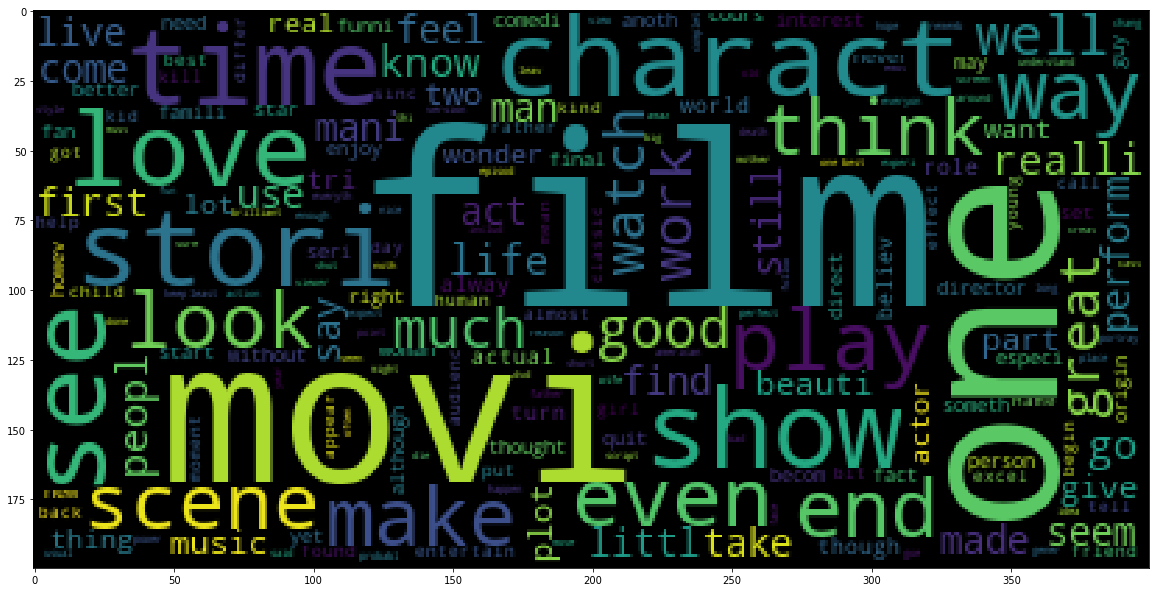

In [7]:
####Create a word cloud with positive and negative words after cleansing
# Creating a list of train and test data to analyse
from wordcloud import WordCloud
imdb_list = df["review"][df.label.isin(['pos'])].unique().tolist()
imdb = " ".join(imdb_list)

# Create a word cloud for psitive words
imdb_wordcloud = WordCloud().generate(imdb)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

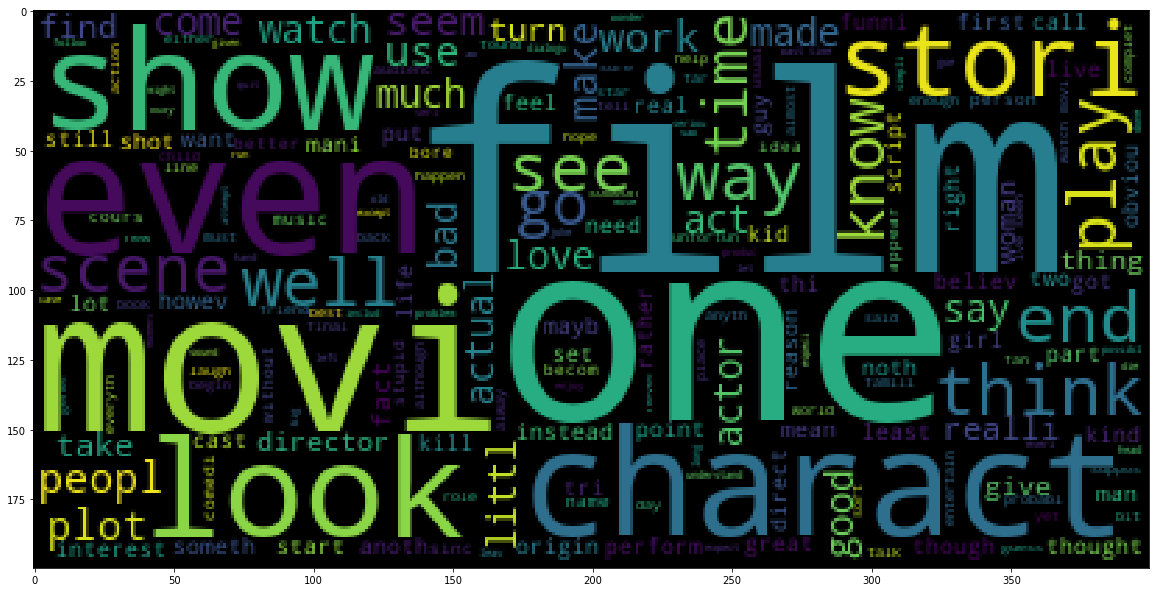

In [8]:
# Creating a list of train and test data to analyse
imdb_list = df["review"][df.label.isin(['neg'])].unique().tolist()
imdb = " ".join(imdb_list)

# Create a word cloud for negative words
imdb_wordcloud = WordCloud().generate(imdb)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

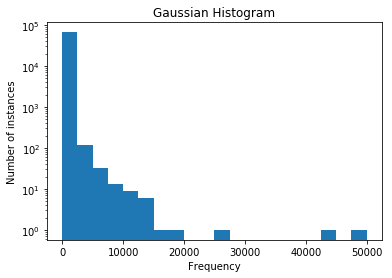

In [11]:
# Creating an object for Count vectorizer and fitting it to positive dataset
from sklearn.feature_extraction.text import CountVectorizer
hist_cv = CountVectorizer()
hist_pos = hist_cv.fit_transform(df[df.label.isin(['pos'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

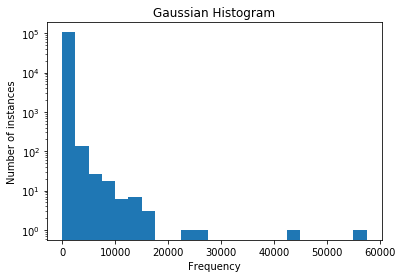

In [12]:
# Creating an object for Count vectorizer and fitting it to negative dataset
hist_cv = CountVectorizer()
hist_neg = hist_cv.fit_transform(df[df.label.isin(['neg'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_neg.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data, bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

In [31]:
####Repeat visualization step 1 & 2 after feature selection and note the impact (Bonus)
import operator
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['review'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df['label'])

from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, Y)

importances = tree_clf.feature_importances_
feature_names = cv.get_feature_names()
feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(tree_clf, prefit=True)
X_updated = model.transform(X)
print('Total features count', X.shape[1])
print('Selected features', X_updated.shape[1])

Total features count 141599
Selected features 14217


In [5]:
word_list = []
for f in range(14217):
    word_list.append(sorted_features[f][0])

In [6]:
count = 0
for sentence in df_algo['review']:
    sentence = [word for word in sentence.lower().split() if word in word_list]
    sentence = ' '.join(sentence)
    df_algo.loc[count, 'review'] = sentence
    count+=1

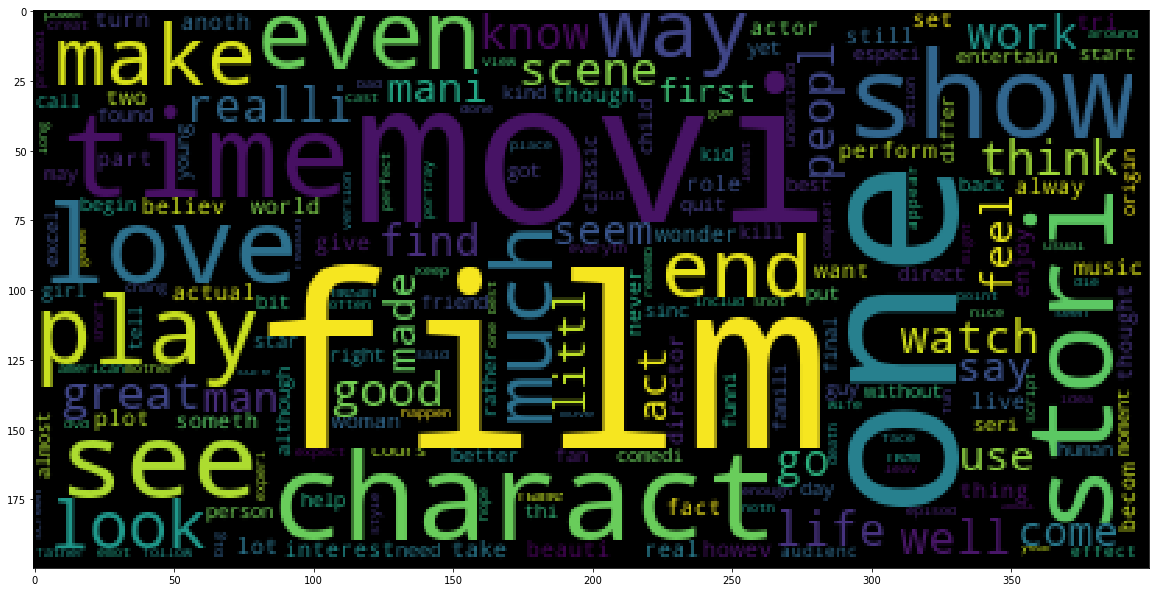

In [32]:
# Creating a list of train and test data to analyse
from wordcloud import WordCloud
imdb_list = df["review"][df.label.isin(['pos'])].unique().tolist()
imdb = " ".join(imdb_list)

# Create a word cloud for psitive words
imdb_wordcloud = WordCloud().generate(imdb)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

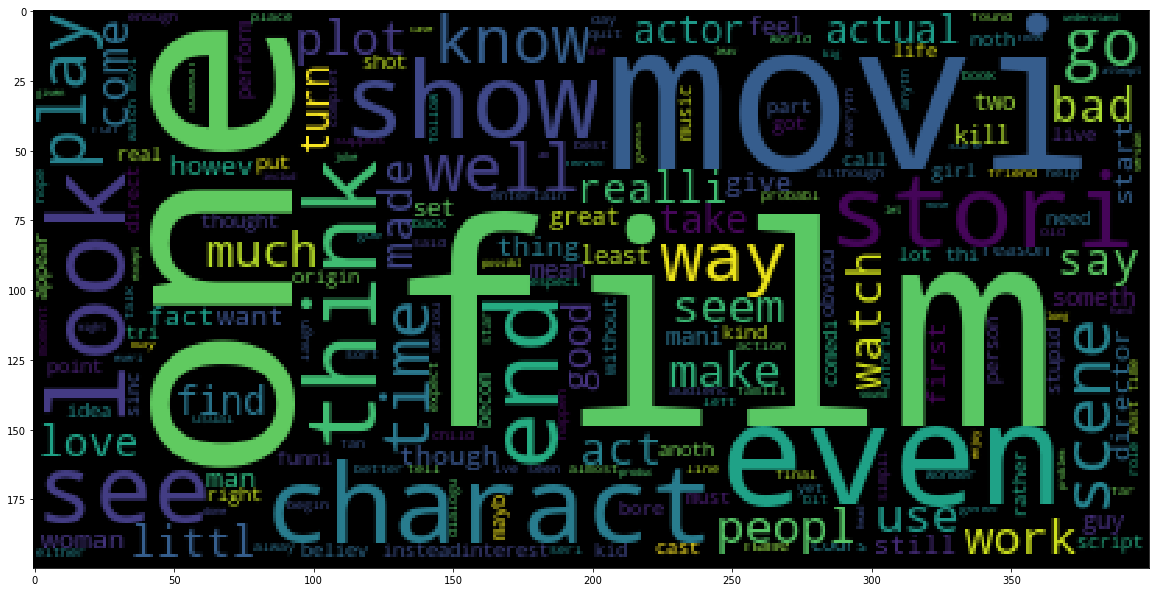

In [20]:
# Creating a list of train and test data to analyse
from wordcloud import WordCloud
imdb_list = df['review'][df.label.isin(['neg'])].unique().tolist()
imdb = " ".join(imdb_list)

# Create a word cloud for negative words
imdb_wordcloud = WordCloud().generate(imdb)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

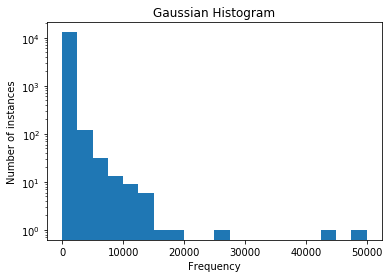

In [21]:
# Creating an object for Count vectorizer and fitting it to positive dataset
from sklearn.feature_extraction.text import CountVectorizer
hist_cv = CountVectorizer()
hist_pos = hist_cv.fit_transform(df[df.label.isin(['pos'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

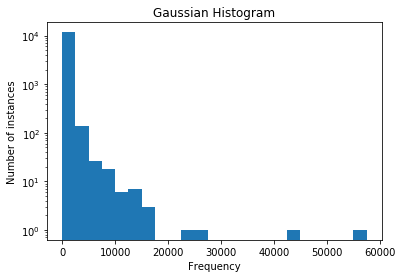

In [22]:
# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer()
hist_neg = hist_cv.fit_transform(df[df.label.isin(['neg'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_neg.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data, bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

In [3]:
df_algo = pd.concat([Train_df,Test_df], keys=['train', 'test'])
df_algo = df_algo.reset_index(col_level=1).drop(['level_1'], axis=1)
df_algo.fillna("",inplace = True)
df_algo.head()

,level_0,review,label
0,train,stori man unnatur feel pig start open scene te...,neg
1,train,airport start brand new luxuri plane load valu...,neg
2,train,film lack someth put finger first charisma par...,neg
3,train,sorri everyon know suppos art film wow hand gu...,neg
4,train,littl parent took along theater see interior o...,neg


In [4]:
###Phase 4 Hypothesis testing  and Feature Selection
import operator
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_algo['review'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df_algo['label'])

from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, Y)

importances = tree_clf.feature_importances_
feature_names = cv.get_feature_names()
feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(tree_clf, prefit=True)
X_updated = model.transform(X)
print('Total features count', X.shape[1])
print('Selected features', X_updated.shape[1])

Total features count 141599
Selected features 13771


In [5]:
word_list = []
for f in range(13771):
    word_list.append(sorted_features[f][0])

In [6]:
count = 0
for sentence in df_algo['review']:
    sentence = [word for word in sentence.lower().split() if word in word_list]
    sentence = ' '.join(sentence)
    df_algo.loc[count, 'review'] = sentence
    count+=1

In [8]:
df_algo = df_algo.to_csv("df_algo.csv", index=False)

In [2]:
df_algo = pd.read_csv('C:\\Users\\Akshat Jain\\Downloads\\df_algo.csv')
df_algo.fillna("",inplace = True)
df_algo.head()

,level_0,review,label
0,train,unnatur pig open terrif exampl absurd comedi f...,neg
1,train,airport brand luxuri plane load valuabl paint ...,neg
2,train,lack put finger charisma lead actress inevit t...,neg
3,train,sorri everyon suppos art wow hand gun screen b...,neg
4,train,parent took along theater interior parent walk...,neg


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorizing complete review set
vect = CountVectorizer()
vect_pos = vect.fit_transform(df_algo.review)

# Visualising the high and low frequency words for complete set
df1 = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
print(df1.nlargest(15, 'frequency').index)

Index(['movi', 'film', 'one', 'like', 'time', 'good', 'make', 'see', 'charact',
       'get', 'watch', 'even', 'would', 'stori', 'it'],
      dtype='object')


In [4]:
word_list = df1.nlargest(100, 'frequency').index

In [6]:
count = 0
for sentence in df_algo['review']:
    sentence = [word for word in sentence.lower().split() if word not in word_list]
    sentence = ' '.join(sentence)
    df_algo.loc[count, 'review'] = sentence
    count+=1

In [7]:
df_algo = df_algo.to_csv("df_algo.csv", index=False)

In [12]:
df_algo = pd.read_csv('C:\\Users\\Akshat Jain\\Downloads\\df_algo.csv')
df_algo.fillna("",inplace = True)
df_algo.head()

,level_0,review,label
0,train,unnatur pig open terrif exampl absurd comedi f...,neg
1,train,airport brand luxuri plane load valuabl paint ...,neg
2,train,lack put finger charisma lead actress inevit t...,neg
3,train,sorri everyon suppos art wow hand gun screen b...,neg
4,train,parent took along theater interior parent walk...,neg


In [11]:
###Hypothesis testing
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
vect_n = vect.fit_transform(df_algo[df_algo.label.isin(['neg'])].review)
df_x = pd.DataFrame(vect_n.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T

In [12]:
vect_p = vect.fit_transform(df_algo[df_algo.label.isin(['pos'])].review)
df_y = pd.DataFrame(vect_p.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T

In [13]:
import scipy.stats
result = scipy.stats.ttest_ind(df_x, df_y, equal_var=False)
print (result)

# Reject or accept null hypothesis
def validation_null_hypothesis(p_value):
    if p_value <= 0.05:
        print ("There is a significant difference")
        return False
    else:
        print ("No significant difference")
        return True

validation_null_hypothesis(result[1])

Ttest_indResult(statistic=array([4.4484316]), pvalue=array([8.68872089e-06]))
There is a significant difference


False

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect_algo = TfidfVectorizer(stop_words='english', analyzer='word')
vect_algo.fit(df_algo.review)
Xf_train = vect_algo.transform(df_algo[df_algo['level_0'].isin(['train'])].review)
Xf_test = vect_algo.transform(df_algo[df_algo['level_0'].isin(['test'])].review)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yf_train = le.fit_transform(df_algo[df_algo['level_0'].isin(['train'])].label)
yf_test = le.fit_transform(df_algo[df_algo['level_0'].isin(['test'])].label)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Xf_train, yf_train, train_size = 0.75, random_state = 0)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(accuracy)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
model.fit(X_train)
prediction = model.predict(X_val)
accuracy = accuracy_score(y_val, prediction)
print(accuracy)


E:\New folder (4)\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.88512
0.86912
0.70736
0.29664


In [7]:
###Supervised Learning: Build a sentiment analysis model to predict positive and negative classes 

# Fit the logistic regression model to the object
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(Xf_train, yf_train)

# predict the outcome for testing data
predictions = clf.predict(Xf_test)
from sklearn.metrics import accuracy_score

# check the accuracy of the model
accuracy = accuracy_score(yf_test, predictions)
print("Observation: logistic regression model gives an accuracy of %.2f%% on the testing data" %(accuracy*100))

Observation: logistic regression model gives an accuracy of 89.14% on the testing data


In [2]:
### Unsupervised data ######

Unsup_df = pd.read_csv('C:\\Users\\Akshat Jain\\Downloads\\Unsup_df.csv')
Unsup_df.head()

,review
0,admit great major film releas say me dozen maj...
1,take low budget inexperienc actor doubl produc...
2,everybodi seen back futur right whether like m...
3,dori day icon beauti sing act warm voic geniu ...
4,seri silli funlov movi big year dori day year ...


In [5]:
#Feature Selection for unsupervised data
from sklearn.feature_extraction.text import CountVectorizer
# Vectorizing unlabelled reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(Unsup_df.review)

# Creating a dataframe for the high frequency words for unlabelled reviews set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T

# Removing high frequency and low frequency data for more accuracy
word_list = df_freq.nlargest(100, 'frequency').index
word_list = word_list.append(df_freq.nsmallest(43750, 'frequency').index)

# Removing unwanted words based on word_list from unlabelled data
count = 0
for sentence in Unsup_df['review']:
    sentence = [word for word in sentence.lower().split() if word not in word_list]
    sentence = ' '.join(sentence)
    Unsup_df.loc[count, 'review'] = sentence
    count+=1

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(Unsup_df.review)
Y = vectorizer.transform(df_algo[df_algo['level_0'].isin(['test'])].review)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_algo[df_algo['level_0'].isin(['test'])].label)

In [10]:
###Unsupervised Learning: Build a clustering model consisting of 2 clusters based on positive and negative reviews
from sklearn.cluster import KMeans
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

# Visualising the 2 clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 worst
 wast
 bore
 laugh
 terribl
 stupid
 kid
 aw
 horribl
 money
Cluster 1:
 beauti
 seri
 famili
 alway
 excel
 differ
 war
 child
 american
 episod


In [17]:
# Prediction for test set using Kmeans clusters
Y = vectorizer.transform(df_algo[df_algo['level_0'].isin(['test'])].review)
prediction = model.predict(Y)

# Actual results of test sets for comparison
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_algo[df_algo['level_0'].isin(['test'])].label)
# check the accuracy of the model

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, prediction)
if accuracy < 0.5:
    accuracy = 1 - accuracy
print("Observation: The unsupervised learning gives an accuracy of %.2f%% on the testing data" %(accuracy*100))

Observation: The unsupervised learning gives an accuracy of 74.47% on the testing data


In [19]:
##Supervised Learning: Compare the performance of different machine learning models, at least 2 

#Fitting logistic regression to training set
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xf_train, yf_train)

predictions = clf.predict(Xf_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yf_test, predictions)
print(accuracy)

0.8691252349906003


In [18]:
##Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(Xf_train, yf_train)
y_pred = rf.predict(Xf_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yf_test, y_pred)
accuracy

0.8716451341946322

In [20]:
####Unsupervised Learning: Compare the performance of different models, at least 2
from sklearn.cluster import KMeans
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=1)
model.fit(X)
prediction = model.predict(Y)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, prediction)
accuracy

0.7426902923883044

In [27]:
###Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
k = 2
Wclustering = AgglomerativeClustering(n_clusters = k, linkage='ward')
Wclustering_pred = Wclustering.fit_predict(X[:500].todense())

In [29]:
##accuracy of hierarchical clustering
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y[:500], Wclustering.labels_)
accuracy

0.94

In [26]:
####Divide the data into 4 clusters to enable finding more classes and analye each clster.
# Creating a k-means object and fitting it to target variable
from sklearn.cluster import KMeans
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state=13)
model.fit(Xf_train)
 
# Visualising the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vect_algo.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :12]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 horror
 worst
 wast
 minut
 effect
 bore
 terribl
 ive
 stupid
 aw
 kill
 money
Cluster 1:
 comedi
 saw
 laugh
 fun
 fan
 wonder
 kid
 dvd
 action
 big
 pretti
 entertain
Cluster 2:
 episod
 seri
 season
 tv
 fan
 televis
 dvd
 anim
 alway
 writer
 cartoon
 doctor
Cluster 3:
 book
 war
 beauti
 world
 famili
 young
 child
 read
 person
 emot
 human
 differ


In [27]:
frame = pd.DataFrame(model.labels_,columns = ['cluster'])
frame['cluster'].value_counts() #no of review per cluster

1    11799
3     6518
0     5682
2     1001
Name: cluster, dtype: int64

In [28]:
####Active Learning: Cluster the training dataset and try and find the genre
# Creating a k-means object and fitting it to target variable
from sklearn.cluster import KMeans
true_k = 9
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state=13)
model.fit(Xf_train)
 
# Visualising the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vect_algo.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :12]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 episod
 seri
 season
 tv
 televis
 fan
 alway
 doctor
 dvd
 writer
 columbo
 got
Cluster 1:
 action
 wonder
 pretti
 saw
 excel
 bit
 big
 fan
 entertain
 day
 dvd
 direct
Cluster 2:
 comedi
 laugh
 joke
 humor
 hilari
 romant
 expect
 fun
 fan
 script
 probabl
 line
Cluster 3:
 song
 danc
 sing
 band
 number
 rock
 video
 dvd
 fan
 saw
 wonder
 stage
Cluster 4:
 kid
 child
 anim
 cartoon
 game
 disney
 famili
 adult
 parent
 fun
 rememb
 saw
Cluster 5:
 worst
 wast
 minut
 money
 terribl
 aw
 ive
 bore
 script
 horribl
 thi
 stupid
Cluster 6:
 book
 read
 novel
 adapt
 version
 disappoint
 differ
 chang
 base
 seri
 saw
 tv
Cluster 7:
 horror
 zombi
 vampir
 gore
 scari
 effect
 flick
 kill
 slasher
 fan
 blood
 pretti
Cluster 8:
 war
 world
 beauti
 human
 famili
 emot
 person
 american
 documentari
 young
 differ
 view


In [29]:
print('''From above we get the following genres:-
Cluster 0 - Television Series
Cluster 1 - Action, entertainment
Cluster 2 - comedy,fun,romantic
Cluster 3 - Dancing,singing,music
Cluster 4 - Cartoon, Animation, Disney
Cluster 5 - terribl
Cluster 6 - novel
Cluster 7 - horror
Cluster 8 - war, documentari''')

From above we get the following genres:-
Cluster 0 - Television Series
Cluster 1 - Action, entertainment
Cluster 2 - comedy,fun,romantic
Cluster 3 - Dancing,singing,music
Cluster 4 - Cartoon, Animation, Disney
Cluster 5 - terribl
Cluster 6 - novel
Cluster 7 - horror
Cluster 8 - war, documentari


In [30]:
###verify with testing data
from sklearn.cluster import KMeans
true_k = 9
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state=13)
model.fit(Xf_test)
 
# Visualising the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vect_algo.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :12]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 episod
 seri
 season
 tv
 fan
 televis
 alway
 doctor
 hope
 dvd
 anim
 air
Cluster 1:
 worst
 wast
 terribl
 minut
 aw
 horribl
 stupid
 money
 bore
 script
 effect
 thi
Cluster 2:
 saw
 dvd
 fan
 game
 song
 fun
 kid
 version
 recommend
 anim
 tv
 wonder
Cluster 3:
 war
 soldier
 german
 world
 battl
 american
 russian
 civil
 vietnam
 human
 armi
 histori
Cluster 4:
 horror
 zombi
 gore
 effect
 monster
 scari
 fan
 flick
 kill
 scare
 hous
 pretti
Cluster 5:
 comedi
 laugh
 joke
 humor
 hilari
 fun
 romant
 expect
 line
 moment
 minut
 bit
Cluster 6:
 book
 read
 novel
 adapt
 chang
 disappoint
 scarlett
 version
 differ
 base
 complet
 fact
Cluster 7:
 beauti
 world
 emot
 differ
 human
 person
 wonder
 audienc
 documentari
 understand
 view
 viewer
Cluster 8:
 kill
 young
 murder
 kid
 wife
 father
 boy
 famili
 child
 friend
 john
 men
